<a href="https://colab.research.google.com/github/V4lciJr/Aplica-o-de-Modelos-de-ML---Aprendizado-Supervisionado/blob/main/Checkout_Modulo_V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease UCI

O conjunto de dados Heart Disease UCI é utilizado para prever a presença de doenças cardíacas em pacientes, com base em diversas características clínicas. O nosso objetivo neste projeto é construir um modelo de classificação binária, onde o modelo deve prever se um paciente tem ou não uma doença cardíaca.

Este conjunto de dados, você pode encontrar no seguinte link: [Heart Disease UCI - UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

O nosso problema pode ser classificado no campo dos problemas de classificação binária, onde a nossa variável alvo o nosso famoso target, será uma saída binária que indica **1 para a presença** ou **0 para a ausência da doença cardíaca.**

Abaixo temos uma descrição resumida das varíaveis que estão dispostas no conjunto:

 - **age:** Idade do paciente (em anos).
 - **sex:** Sexo do paciente (1 = masculino, 0 = feminino).
 - **cp:** Tipo de dor no peito (4 valores diferentes que indicam diferentes tipos de dor).
 - **trestbps:** Pressão arterial em repouso (em mmHg).
 - **chol:** Nível de colesterol no sangue (em mg/dL).
 - **fbs:** Se o nível de açúcar no sangue em jejum é superior a 120 mg/dl (1 = sim, 0 = não).
 - **restecg:** Resultado do eletrocardiograma em repouso (3 valores diferentes).
 - **thalach:** Frequência cardíaca máxima atingida.
 - **exang:** Se o paciente apresenta angina induzida por exercício (1 = sim, 0 = não).
 - **oldpeak:** Depressão do segmento ST induzida por exercício, medida em relação ao repouso.
 - **slope:** Inclinação do segmento ST durante o exercício (3 valores possíveis).
 - **ca:** Número de vasos principais coloridos pela fluoroscopia (0-3).
 - **thal:** Defeito de talassemia (3 valores possíveis).
 - **target:** Variável alvo, 1 indica que o paciente tem doença cardíaca e 0 indica que não tem.


## Análise Exploratória

Antes de mais nada e de sairmos aplicando o modelo, precisamos primeiro fazer uma análise exploratória detalhada, para sabermos com quais tipos de dados estamos lidando, pois temos modelos que são sensíveis a Outliers ou valores ausentes, exemplo do Kmeans que trabalha com médias para calcular os seus centróides, mas temos modelos que são robustos para outliers, exemplo as SVM, que se precupam em calcular o melhor hiperplano e maximizar a margem entre as classes.

**Passos da Análise:**
 - Carregar o conjunto de dados e transformar num dataset pandas, para podermos fazer uso das poderosas funções que a biblioteca nos fornece
 - Verificar a estrutura do dataset, usando a **df.head()** e informações de tipos de dados com a **df.info()**
 - Analisar e contabilizar os valores ausentes se houver, combinando as funções **df.isnull()** e **sum()**
 - Visualizar as estatísticas descritivas **df.describe()**
 - Visualizar por meio de gráficos as distribuições das variáveis, em relação as outras variáveis existentes

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
                "exang", "oldpeak", "slope", "ca", "thal", "target"]

df = pd.read_csv(url, header=None, names=column_names)

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


O Dataset possui 303 linhas e 14 colunas, a maiora dos tipos de nossos dados são float64 e com essa função já conseguimos ver que não temos nenhum valor ausente, ou seja non-null, todos os nossos valores, estão devidamente preenchidos e vamos certificar com a função abaixo:

In [ ]:
# certificando que não possuímos valores nulos
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Visualizando as estatísticas descritivas
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


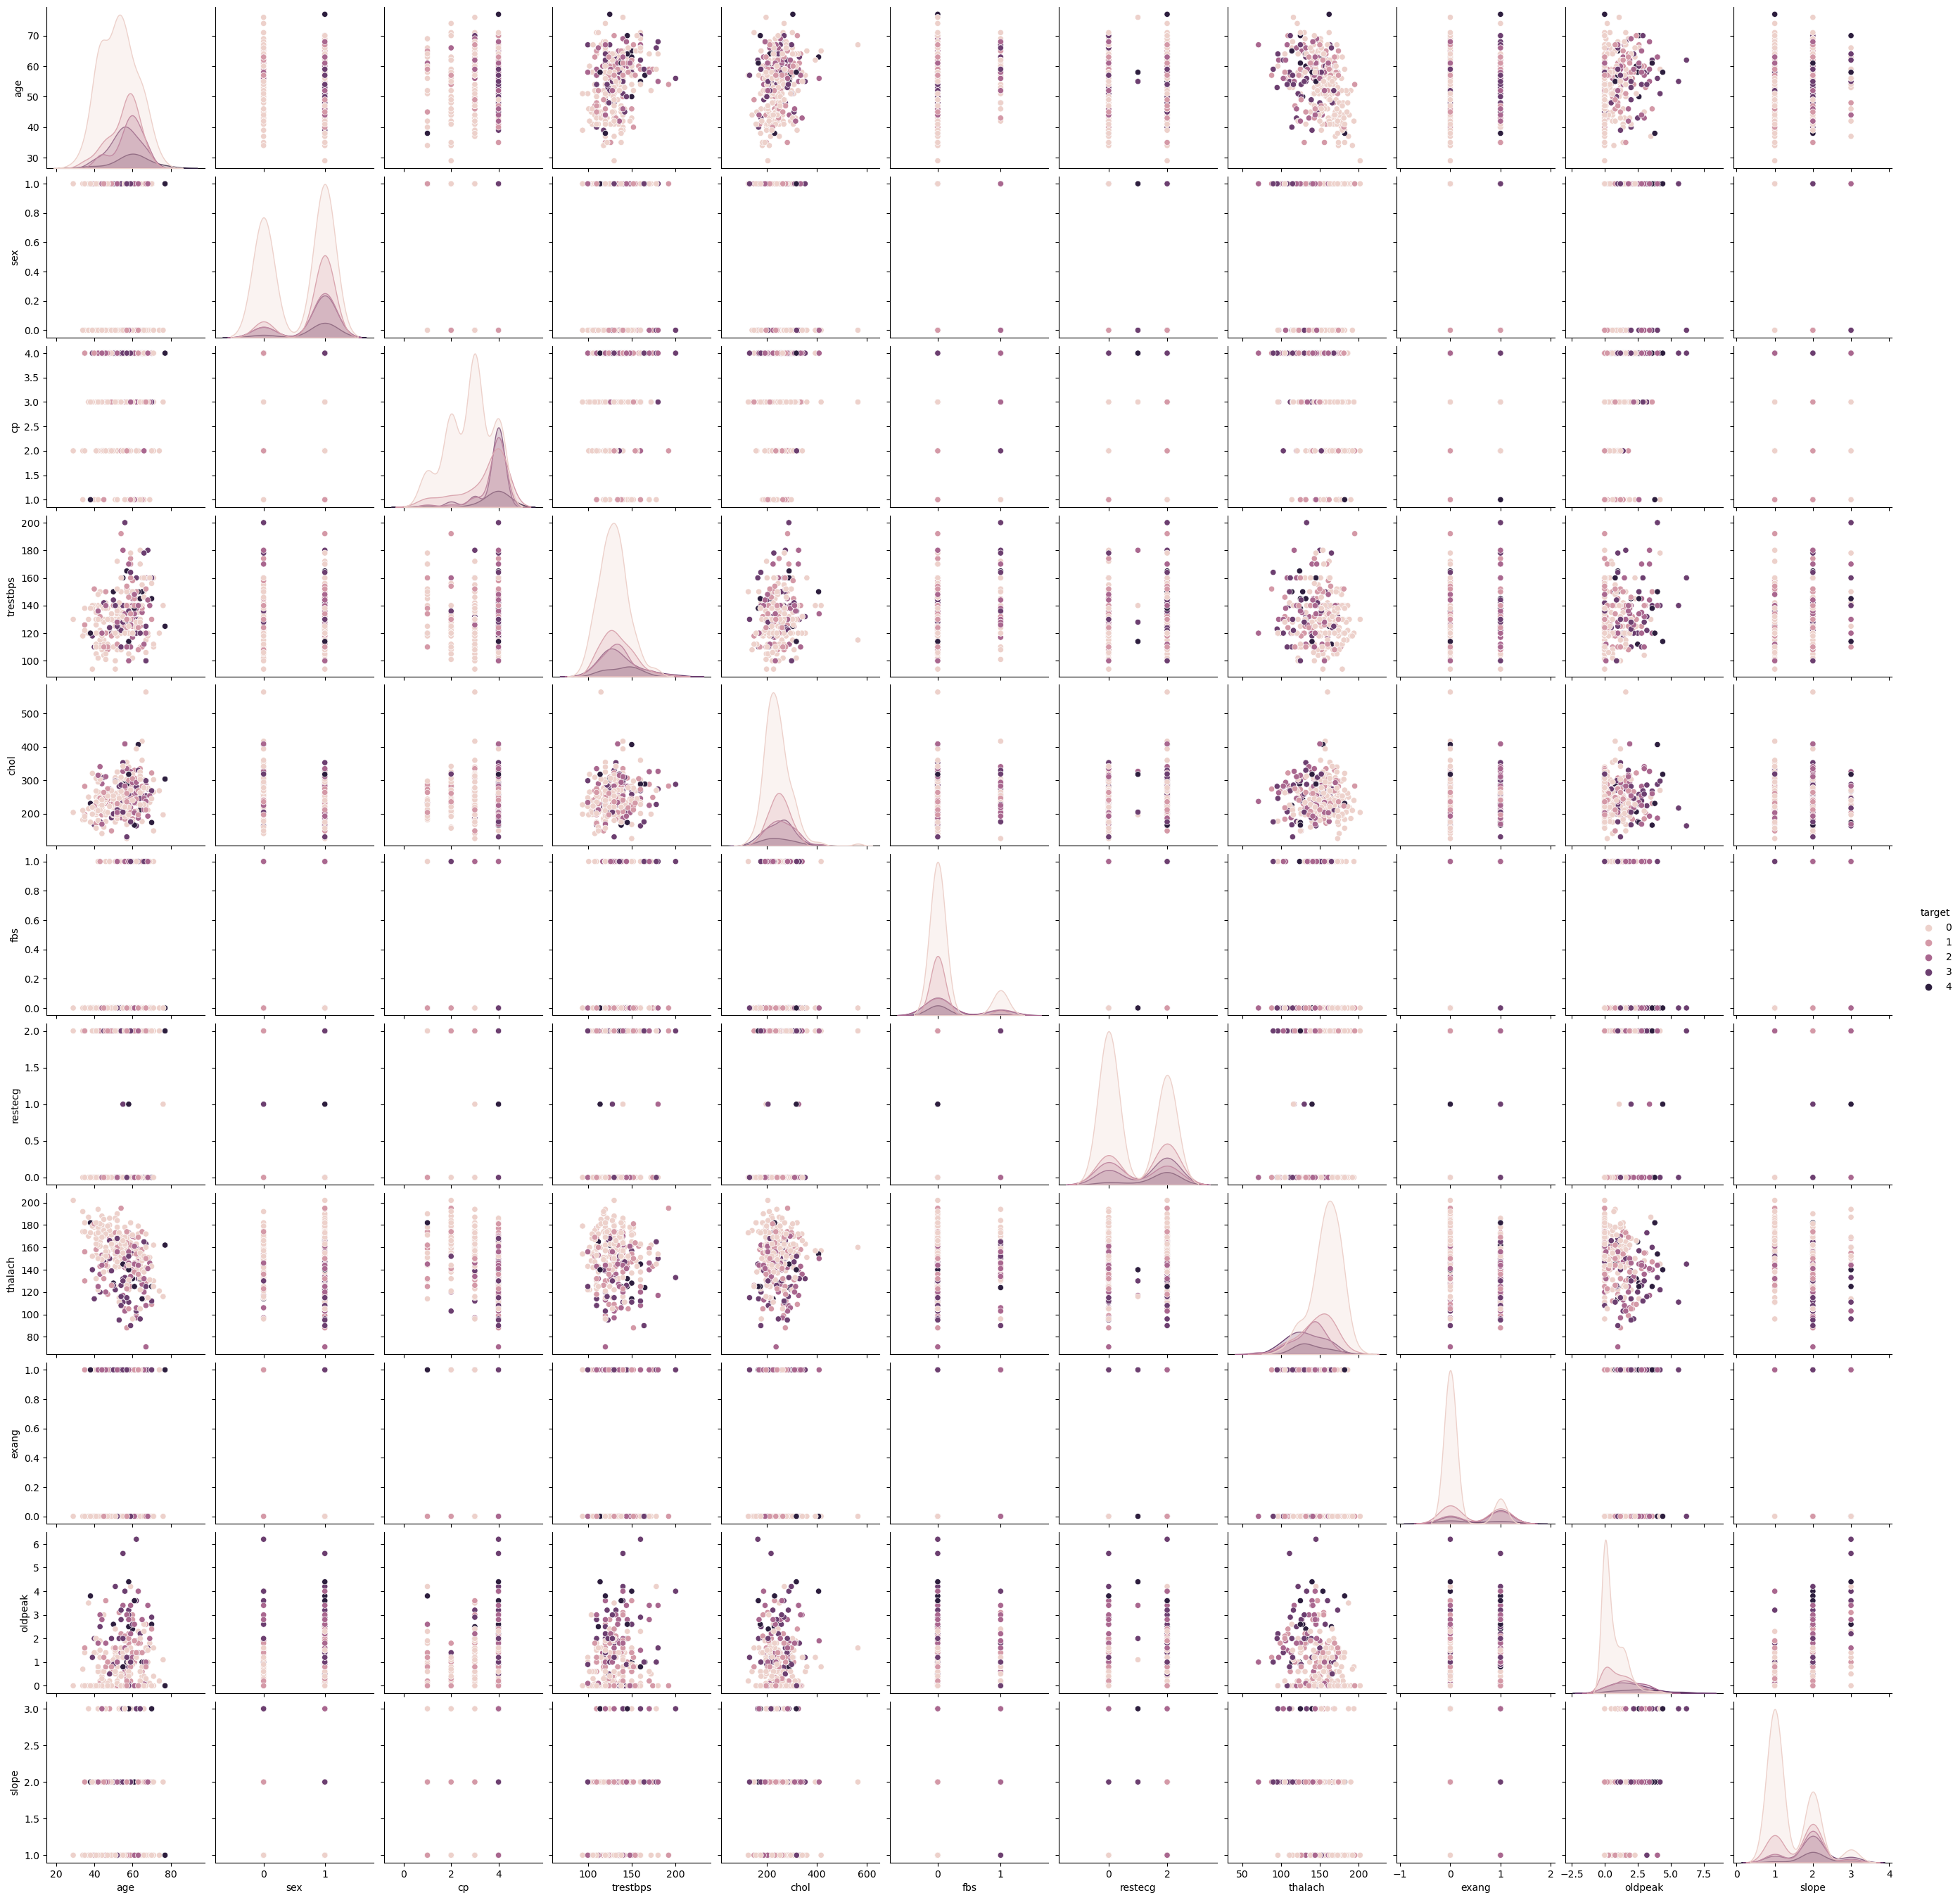

In [ ]:
# Visualizando as distribuições das varíaveis
sns.pairplot(df, hue='target')
plt.show()

Quanto maior o Dataset mais esse gráfico fica um pouco difícil de fazer uma análise mais aprofundada, por isso o utilizamos para termos uma noção inicial das distribuições, abaixo plotaremos um histograma das variáveis numéricas.

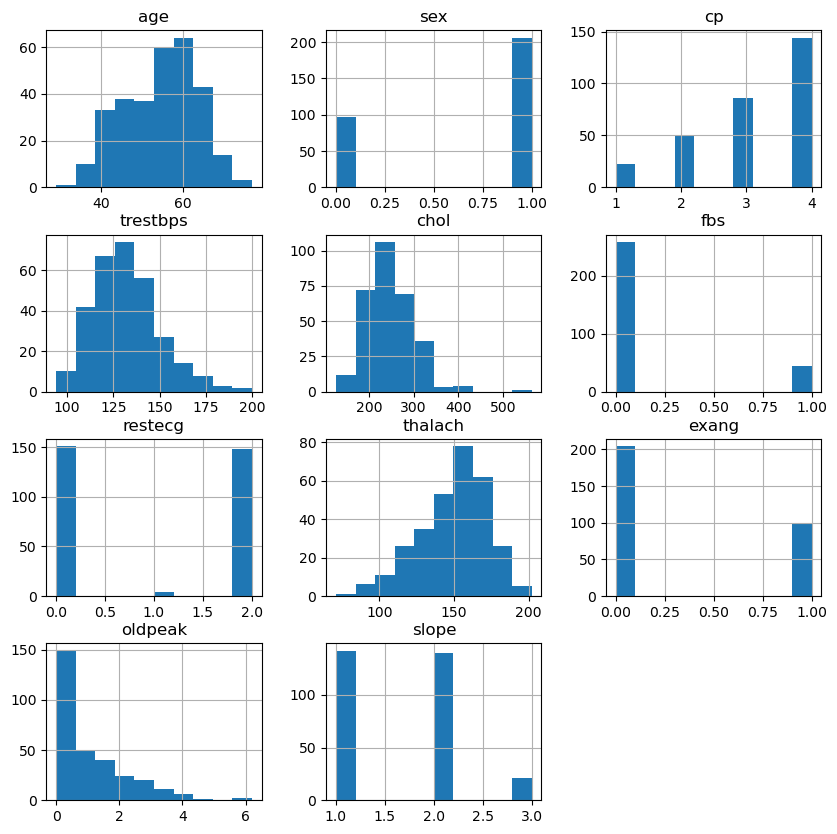

In [ ]:
# Histograma das variáveis numéricas

df.drop('target', axis=1).hist(figsize=(10, 10))
plt.show()

## Pré-processamento dos Dados

Agora que fizemos uma boa análise exploratória e o bom é que esse conjunto de dados não possuem valores ausentes, caso contrário, esse seria o momento de fazermos esse tratamento, mas temos variáveis categóricas, como a 'sex', 'restecg', 'slope', entre outras variáveis, que precisam ser codificadas como categóricas, para que o modelo possa usá-las, em sua totalidade, então vamos usar o [OneHotEnconder](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.OneHotEncoder.html) ou [LabelEncoder](https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html) para essas variáveis, para mais informações sobre o que essas varíaveis fazem, clique no link e consulte a documentação.
Outro ponto que diz respeito ao processamento dos dados, consiste nas varíveis que possam ou possuem diferentes escalas, como a 'age', 'chol', 'trestbps', o que pode afetar o modelo, para isso vamos aplicar técnicas de normalização e padronização.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# divindindo os dados em variáveis independentes X e y
X = df.drop('target', axis=1)
y = df['target'].apply(lambda x: 1 if x > 0 else 0)


# processo de categorização das variáveis ('sex', 'ca', 'thal', ...)
X['sex'] = X['sex'].astype('category')
X['cp'] = X['cp'].astype('category')
X['restecg'] = X['restecg'].astype('category')
X['slope'] = X['slope'].astype('category')
X['thal'] = X['thal'].astype('category')


# aplicando a técnica de OneHot nas variáveis categóricas
X = pd.get_dummies(X, drop_first=True)


# normalizando as variáveis numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# dividindo o conjunto em dados 80% treino e 20% teste, quer saber uma curiosidade sobre o random_state 42, leia o livro o Guia do Mochileiro das galáxias
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Construção e Avaliação dos Modelos

Neste projeto, foi solicitado que usássemos vários modelos e os comparássemos uns com os outros, aqui usaremos os seguintes:

- **Logistic Regression**
- **Random Forest**
- **K-Nearest Neighbors (KNN)**
- **SVM**

Vamos usar como métricas de avaliação a acurácia, precisão, recall, F1-score e ROC AUC.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# inicializando os modelos
models = {
    'Regressão Logístcia': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True)
}

# treinando e avaliando os modelos, já que estamos usando vários
for name, model in models.items():

    # treinamento
    model.fit(X_train, y_train)


    # fazendo as previsões
    y_pred = model.predict(X_test)


    # avaliando o modelo
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(f'Modelo: {name}')
    print(f'Acurácia: {accuracy:.3f}')
    print(f'ROC AUC: {auc:.3f}')
    print(classification_report(y_test, y_pred))
    print("*" * 60)


Modelo: Logistic Regression
Acurácia: 0.803
ROC AUC: 0.893
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

************************************************************
Modelo: Random Forest
Acurácia: 0.885
ROC AUC: 0.934
              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61

************************************************************
Modelo: KNN
Acurácia: 0.869
ROC AUC: 0.931
              precision    recall  f1-score   support

           0  

Analisando as métricas, podemos concluir que o melhor modelo utilizado foi o **Random Forest**, mesmo que analisando os valores de acurácia e ROC AUC, os resultados dos modelos estejam em intervalos semelhantes, mas nesse caso se fóssemos escolher apenas um, seria o Random, por possui o melhor valor de acurácia, ROC AUC e F1-score, que avalia meédia da precisão e recall.

## Visualizando Graficamente

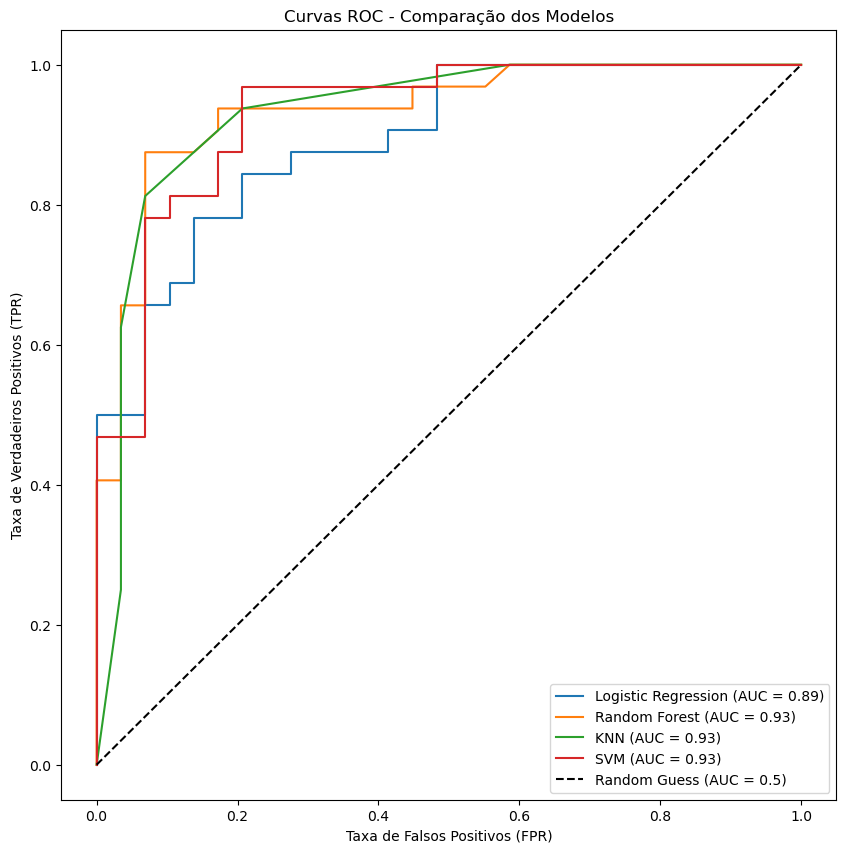

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.legend(loc='lower right')

# Plotando a linha de aleatoriedade (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

plt.title('Curvas ROC - Comparação dos Modelos')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')

plt.show()

### Caso queira uma avaliação individual dos modelos em relação a curva

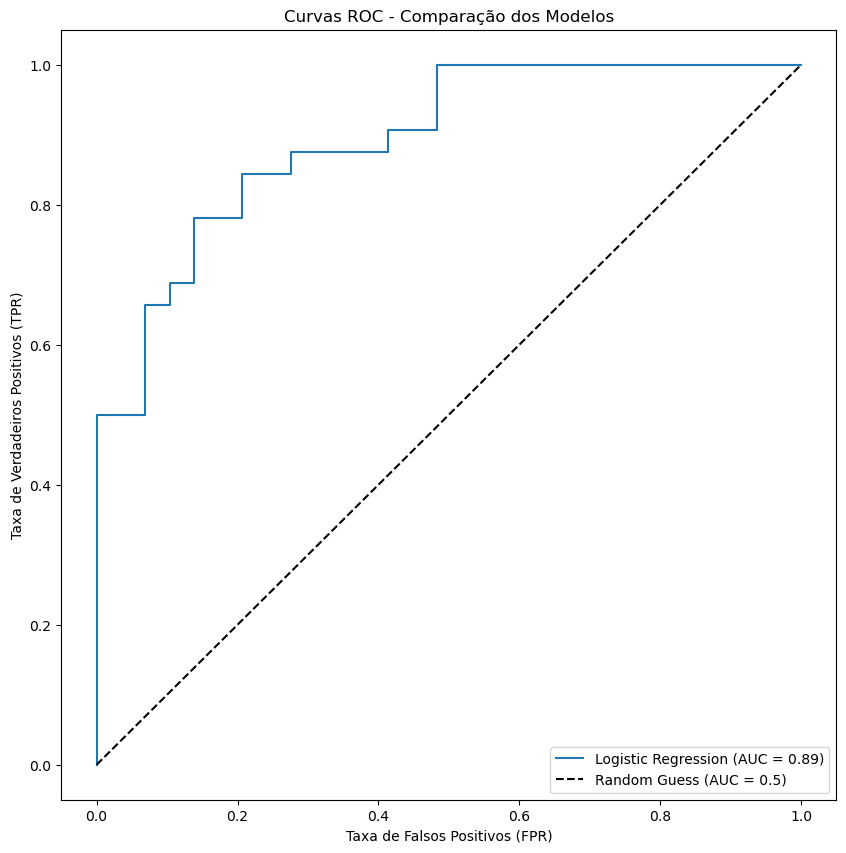

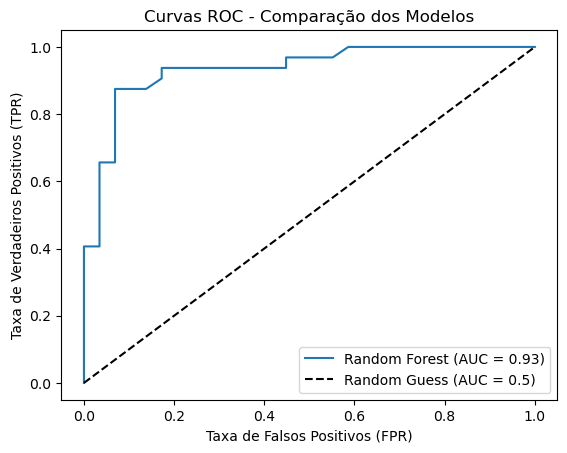

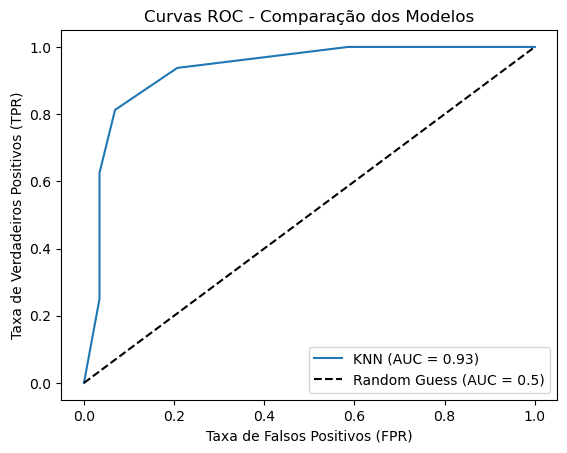

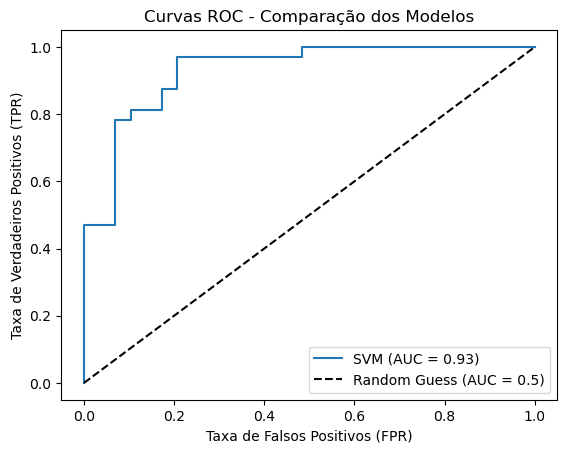

In [ ]:
plt.figure(figsize=(10, 10))

for name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
    plt.legend(loc='lower right')

    # Plotando a linha de aleatoriedade (AUC = 0.5)
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

    plt.title('Curvas ROC - Comparação dos Modelos')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
    plt.legend(loc='lower right')

    plt.show()